# Homework 02 
## IANNWFT 20/21
## Group 02

## Perceptron Logical Gates

In this notebook we implement a Multi-layer perceptron and train it to solve logical gates. Specifically, we focus on the implementation of the backpropagation algorithm in order to solve the XOR problem. 

That means, e.g. for the AND gate, if we put in a 0 and a 1, the perceptron should output 0. It should only output 1 if the input was (1,1).

For the XOR gate, the Perceptron should return 1 if only one of the inputs was 1 and the other one 0 -->  (0,1) or (1,0). For (0,0) and (1,1) it should return 0.

And so on...

In [169]:
# Import numpy
import numpy as np 

## Logical Gates

In [170]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are the possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

## Implement the Perceptron.

In [171]:
class Perceptron:
    ''' Implements a single perceptron handling its own weights and bias.
    
    Attributes:
    ----------
        input_units (int): 
            size of input vector resulting in the number of weights for the perceptron.
        weights (float): 
            weights for the perceptron.
        bias (float, int): 
            bias for the perceptron.
        alpha (int): 
            learning rate.
        last_input (ndarray):
            last imput of the perceptron
        last_weighted_sum (float, ndarray, int):
            last weighted sum before passing through activation function
        last_activation (float):
            last activation after passing through activation function
        last_delta (float, int):
            last (updated) delta 
    
    Methods:
    --------
        sigmoid(self, activations):
            computes the sigmoid (sigma(t)=1/1+e^(-t)) of the activation given (e.i., the weighted sum)
        sigmoid_prime(self, activations):
            calculates the derivative of the sigmoid fucntion for a specific activation (e.i., the weighted sum)
        forward_step(self, input):
            performs a perceptron forward step
        update(self, delta):
            update the weights and bias based on the delta error.
    '''

    def __init__(self, input_units):
        ''' 
        Arguments:
        ---------
        input_units:
            size of input vector resulting in the number of weights for the perceptron.
        
        '''
        self.input_units = input_units

        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()

        # 2. Define the learning rate as 1.
        self.alpha = 1

    def sigmoid(self, activations):
        ''' Implements the Sigmoid activation funtion computing sigma(t)=1/1+e^(-t)
        
        Arguments:
        ---------
        activations (float):
            the weighted sum of the perceptron
        '''
        # Implementes Sigmoid activation function
        return 1 / (1 + np.exp(-activations))
    
    def sigmoid_prime(self, activations):
        '''Calculates the derivative of the sigmoid function taking as its 
        argument the activations.
        
        Argument:
        --------
        activations (float):
            the weighted sum
        '''
        return self.sigmoid(activations) * (1 - self.sigmoid(activations))

    def forward_step(self, input):
        ''' Perform a perceptron forward step
        
        Arguments:
        ---------
        input (float):
            an array of numbers on which to performe the forward calculation (initially 0 and 1)
            
        '''
        self.last_input = input

        # Perform a perceptron forward step.
        weighted_sum = self.weights @ input + self.bias
        self.last_weighted_sum = weighted_sum

        # 2. Return a 1 or a 0, depending on whether the perceptron
        # surpassed the threshold as defined by the activation function
        self.last_activation = self.sigmoid(weighted_sum)
        return self.last_activation

    def update(self, delta):
        '''Updates both the bias and the weights
        Argument:
        ---------
        delta (float):
            the error needed to compute the derivatives with respect to any weight
        '''
        self.last_delta = delta
        self.weights -= self.alpha * delta * self.last_input
        self.bias -= self.alpha * delta * 1

    

## Implement the Multi-layer Perceptron

In [172]:
class MLP():
    ''' Implements a Multi-layer Perceptron for any number of layer and any number of perceptrons.
    For simplicity, we assumme only 1 hidden layer and 4 perceptrons. When not specified, 
    these will be the default values.
    
    Attributes:
    ----------
        layers (list): 
            layers in the network
        output (object):
            reference to the output perceptron
    
    Methods:
    -------
        forward_step(self, input):
            propagate forward through the layers
        backprop_step(self, label):
            propagate backward through the layers
    '''
    def __init__(self, input_units, num_layers=1, num_perceptrons=4):
        '''
        Argument:
        --------
            input_units (int):
                size of input vector resulting in the number of weights for the perceptron
            num_layers (int):
                layers in the network
            num_perceptrons (int):
                perceptrons per hidden layer
        '''
        # We assume 1 or many layers of perceptrons, all layers have the same number of perceptrons for simplicity
        self.layers = []

        # We initialize each layer of perceptrons
        for layer in range(num_layers + 1):
            p = []
            for n in range(num_perceptrons):
                # In the first layer each perceptron has 'input_units' number of inputs
                if layer == 0:
                    p.append(Perceptron(input_units))
                # In the latter layers each perceptron has 'num_perceptrons' number of inputs
                elif layer < num_layers:
                    p.append(Perceptron(num_perceptrons))
                # We also initialize a single final output perceptron with 'num_perceptrons' number of inputs
                else:
                    p.append(Perceptron(num_perceptrons))
                    break
            self.layers.append(p)

        # Create a quick reference to the output perceptron as we need it quite often
        self.output = self.layers[num_layers][0]

    def forward_step(self, input):
        ''' Propagate forward through the layers of the network
        Argument:
        --------
            input (list):
                activations of the previous layer
        '''
        # We propagate forward through the layers
        for i, layer in enumerate(self.layers):
            # In the first layer, we simply run the forward step with the input
            if i == 0:
                activations = input
            # In the latter layers, we get the input from the previous layers output
            else:
                activations = []
                for m in self.layers[i-1]:
                    activations.append(m.last_activation)

            # Now propate the forward step to the current layer's perceptrons
            for n in layer:
                n.forward_step(np.reshape(activations, newshape=(-1)))

        # Store the output value
        return self.output.last_activation

    def backprop_step(self, label):
        ''' Propagate backward through the layers of the network
        Argument:
        --------
            label (int):
                desired output or target.
        '''
        # We propagate backward through the layers
        for l in reversed(range(len(self.layers))):
            # For the output layer we run a special delta function
            if l == len(self.layers) - 1:
                delta = -(label - self.output.last_activation) * self.output.sigmoid_prime(self.output.last_weighted_sum)
                self.output.update(delta)
            # For the hidden layers we run an alternate delta function
            else:
                for i, n in enumerate(self.layers[l]):
                    delta = 0
                    for j in self.layers[l+1]:
                        delta += j.last_delta * j.weights[i]
                    delta *= n.sigmoid_prime(n.last_weighted_sum)
                    n.update(delta)        


## Training and Visualization of the MLP

Now, after having implemented the MLP, let's train it by creating an instance of the MLP class consisting of 1 hidden layer and 4 perceptrons for 1000 epochs. We will train this MLP instance on all logical gates while at the same time visualizing the training progress for each gate. 


New Gate:
Input: [0 0] 	 True Label: 0 	 Network's Prediction: 0.005205
Input: [0 1] 	 True Label: 0 	 Network's Prediction: 0.084300
Input: [1 0] 	 True Label: 0 	 Network's Prediction: 0.086370
Input: [1 1] 	 True Label: 1 	 Network's Prediction: 0.894114


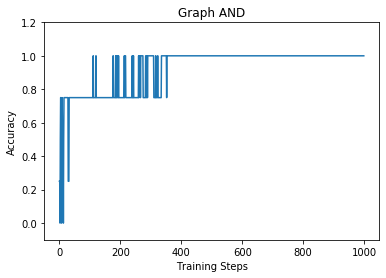


New Gate:
Input: [0 0] 	 True Label: 0 	 Network's Prediction: 0.075965
Input: [0 1] 	 True Label: 1 	 Network's Prediction: 0.949748
Input: [1 0] 	 True Label: 1 	 Network's Prediction: 0.951601
Input: [1 1] 	 True Label: 1 	 Network's Prediction: 0.994933


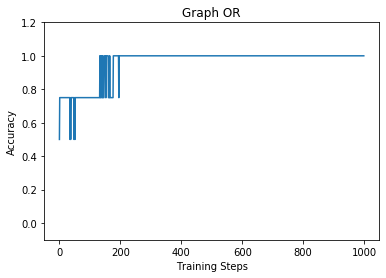


New Gate:
Input: [0 0] 	 True Label: 1 	 Network's Prediction: 0.998082
Input: [0 1] 	 True Label: 1 	 Network's Prediction: 0.937586
Input: [1 0] 	 True Label: 1 	 Network's Prediction: 0.934127
Input: [1 1] 	 True Label: 0 	 Network's Prediction: 0.091979


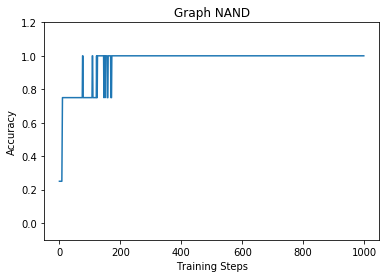


New Gate:
Input: [0 0] 	 True Label: 1 	 Network's Prediction: 0.918902
Input: [0 1] 	 True Label: 0 	 Network's Prediction: 0.055548
Input: [1 0] 	 True Label: 0 	 Network's Prediction: 0.062736
Input: [1 1] 	 True Label: 0 	 Network's Prediction: 0.019734


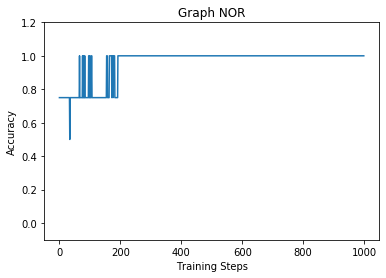


New Gate:
Input: [0 0] 	 True Label: 0 	 Network's Prediction: 0.091708
Input: [0 1] 	 True Label: 1 	 Network's Prediction: 0.845048
Input: [1 0] 	 True Label: 1 	 Network's Prediction: 0.829107
Input: [1 1] 	 True Label: 0 	 Network's Prediction: 0.130953


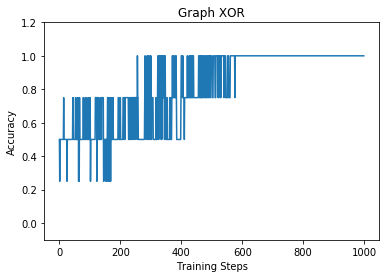

In [174]:
# Create a list with the targets we want to trian on
ts = [t_and, t_or, t_nand, t_nor, t_xor]

# Create a list with all names of the gates for later plotting
t_names = ['Graph AND', 'Graph OR', 'Graph NAND', 'Graph NOR', 'Graph XOR']


# Iterate over the targets to train on and keep track of each iteration for later plotting
for counter, t in enumerate (ts):
    # Initialize a MLP.
    mlp = MLP(2, num_layers=1, num_perceptrons=4)
    
    # Initialize lists to store steps and performance
    steps = []
    accuracies = []

    # We train for 1000 steps as specified in the homework
    for i in range(1000):
        steps.append(i)

        # 1. Draw a random sample from x and the corresponding t
        index = np.random.randint(len(x))
        sample = x[index]
        label = t[index]
        
        # 2. Perform a full training step
        mlp.forward_step(sample)
        mlp.backprop_step(label)

        # Calculate the performance over all four possible inputs.
        accuracy_sum = 0
        
        
        for k in range(len(x)):
            output = mlp.forward_step(x[k])
            # Classification is correct when target is 1 and output from network is greater than 0.5
            if t[k] == 1 and output >= 0.5:
                accuracy_sum += 1
            
            # Classification is correct when target is 0 and output is less than 0.5
            if t[k] == 0 and output < 0.5:
                accuracy_sum += 1
        
        # Divide through all the training examples
        accuracy = accuracy_sum / 4   
        # Append correct classification
        accuracies.append(accuracy)

    print("\n" + 'New Gate:')
    
    # Print the predictions of the network
    for n in range(len(x)):
        output = mlp.forward_step(x[n])
        print("Input: %s \t True Label: %d \t Network's Prediction: %f" % (np.array2string(x[n]), t[n], output))
    
    
    # Plot the accuracy as a function of the training steps for each logical gate
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(steps, accuracies)
    plt.xlabel("Training Steps")
    plt.ylabel("Accuracy")
    plt.ylim([-0.1, 1.2])
    plt.title(t_names[counter])
    plt.show()
    

